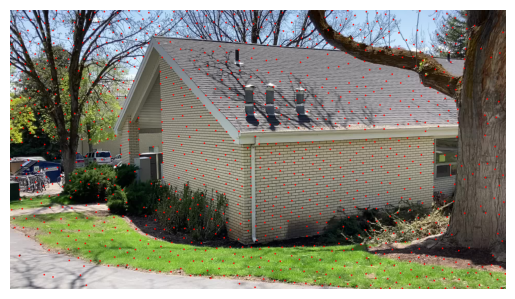

In [9]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image and converting into B?W
image = cv2.imread("Data/20230501_205454000_iOS/output_0001.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=2048, qualityLevel=0.02, minDistance=32)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Showing the image
plt.imshow(RGB_img)
plt.axis('off')
plt.show()

# cv2.imshow('good_features', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

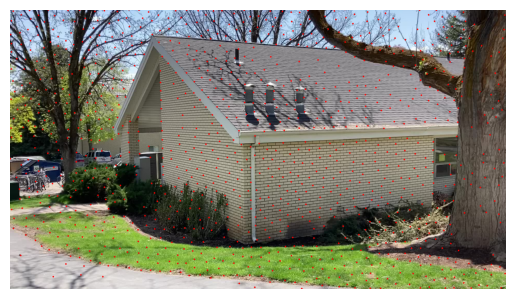

In [1]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image and converting into B?W
image = cv2.imread("Data/20230501_205454000_iOS/output_0002.jpg")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Applying the function
corners = cv2.goodFeaturesToTrack(
    gray_image, maxCorners=2048, qualityLevel=0.02, minDistance=32)
corners = np.float32(corners)
  
for item in corners:
    x, y = item[0]
    x = int(x)
    y = int(y)
    cv2.circle(image, (x, y), 3, (0, 0, 255), -1)

RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Showing the image
plt.imshow(RGB_img)
plt.axis('off')
plt.show()

# cv2.imshow('good_features', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

https://www.youtube.com/watch?v=RtsCs_VfszE

https://www.youtube.com/watch?v=Ilv6FYVZuVQ

https://www.youtube.com/watch?v=E1DMomAlDJo